In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df1=pd.read_csv("l1.csv")
df1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [27]:
df2=pd.read_csv('l2.csv')
df2.drop(['Unnamed: 0'],axis=1,inplace=True)


In [28]:
df=pd.concat([df1,df2],axis=1)

In [29]:
df.head()

,balance,housing,loan,day,duration,campaign,pdays,Previous,deposit
0,2343.0,1.0,0.0,5.0,1042.0,1.0,0.0,0.0,1
1,45.0,0.0,0.0,5.0,1467.0,1.0,0.0,0.0,1
2,1270.0,1.0,0.0,5.0,1389.0,1.0,0.0,0.0,1
3,2476.0,1.0,0.0,5.0,579.0,1.0,0.0,0.0,1
4,184.0,0.0,0.0,5.0,673.0,2.0,0.0,0.0,1


In [30]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [31]:
df.isnull().any()

balance     False
housing     False
loan        False
day         False
duration    False
campaign    False
pdays       False
Previous    False
deposit     False
dtype: bool

In [32]:
x=df.iloc[:,0:8].values
y=df.iloc[:,8].values

In [33]:
print("size of independent variable is : ",x.shape)
print("size of dependent variable is : ",y.shape)

size of independent variable is :  (11162, 8)
size of dependent variable is :  (11162,)


In [34]:
from sklearn.model_selection import train_test_split
x_1,x_test,y_1,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
x_train,x_cv,y_train,y_cv=train_test_split(x_1,y_1,test_size=0.15,random_state=0)

In [36]:
print("TRAINING DATA")
print("X_train Shape : ",x_train.shape)
print("Y_train Shape : ",y_train.shape)
print("*"*50)
print("CROSS VALIDATED DATA")
print("X_cross validated Shape : ",x_cv.shape)
print("Y_cross validated Shape : ",y_cv.shape)
print("*"*50)
print("TESTING DATA")
print("X_test Shape : ",x_test.shape)
print("X_test Shape : ",y_test.shape)

TRAINING DATA
X_train Shape :  (7589, 8)
Y_train Shape :  (7589,)
**************************************************
CROSS VALIDATED DATA
X_cross validated Shape :  (1340, 8)
Y_cross validated Shape :  (1340,)
**************************************************
TESTING DATA
X_test Shape :  (2233, 8)
X_test Shape :  (2233,)


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
x_train=sc.fit_transform(x_train)
x_cv=sc.transform(x_cv)
x_test=sc.transform(x_test)

In [39]:
from sklearn.svm import SVC
svm1=SVC()

In [40]:
svm1.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_pred_svm=svm1.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
acc_svm=accuracy_score(y_pred_svm,y_test)
print("Accuracy Score:",acc_svm*100,"%")

Accuracy Score: 78.3699059561 %


In [11]:
svm1.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
y_pred_svm=svm1.predict(x_cv)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
acc_svm=accuracy_score(y_pred_svm,y_cv)
print("Accuracy Score:",acc_svm*100,"%")

Accuracy Score: 78.5820895522 %


In [71]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_cv,y_pred_svm)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_cv,y_pred_svm)))

Accuracy Score : 0.785820895522
Confusion Matrix : 
[[528 151]
 [136 525]]


In [49]:
from sklearn.model_selection import StratifiedKFold
folds=10
skf=StratifiedKFold(n_splits=folds,shuffle=True,random_state=0)

In [50]:
skf

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [18]:
from sklearn.model_selection import GridSearchCV
grid_values = {'kernel':['rbf','linear'],'gamma':[0.1,0.2,0.3],'C':[0.01,0.1,1],'class_weight':['balanced']}
grid_clf_acc = GridSearchCV(svm1, param_grid = grid_values,scoring = 'accuracy',cv=skf)
grid_clf_acc.fit(x_train, y_train)

print(grid_clf_acc.best_estimator_)

y_pred_acc = grid_clf_acc.predict(x_cv)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [19]:
print(grid_clf_acc.best_estimator_)


SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [51]:
svm1=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
svm1.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
y_pred_svm1=svm1.predict(x_cv)

In [54]:
acc_svm1=accuracy_score(y_pred_svm1,y_cv)
print("Accuracy Score:",acc_svm1*100,"%")

Accuracy Score: 78.8059701493 %


In [25]:
y_test.shape

(2233,)

In [27]:
y_pred_svm1.shape

(1340,)

In [28]:
y_test.ndim

1

In [55]:
svm2=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
svm2.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
y_test=y_test.reshape(-1,1)

In [58]:
y_pred_svm2=svm2.predict(x_test)

In [59]:
acc_svm2=accuracy_score(y_pred_svm2,y_test)
print("Accuracy Score:",acc_svm2*100,"%")

Accuracy Score: 78.5490371697 %


In [60]:
from sklearn.metrics import confusion_matrix
Cn=confusion_matrix(y_test,y_pred_svm2)

In [61]:
C=pd.DataFrame(Cn)
C

,0,1
0,921,284
1,195,833


In [62]:
import sklearn.metrics as metrics
fpr,tpr,threshold=(metrics.roc_curve(y_test,y_pred_svm2))
roc_auc_svm=metrics.auc(fpr,tpr)

In [63]:
roc_auc_svm

0.787313318371894

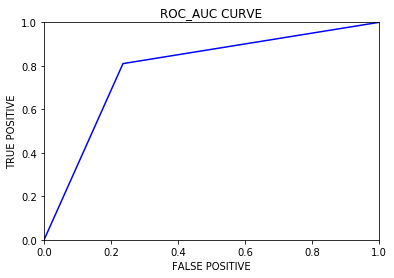

In [64]:
plt.plot(fpr,tpr,'b',label='auc= %0.2f'% roc_auc_svm)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("ROC_AUC CURVE")
plt.xlabel("FALSE POSITIVE")
plt.ylabel("TRUE POSITIVE")
plt.show()

In [68]:
print('F1 Score : ' + str(f1_score(y_test,y_pred_svm2)))

F1 Score : 0.77668997669


In [69]:
from sklearn.metrics import log_loss

In [72]:
print('log loss : ' + str(log_loss(y_test,y_pred_svm2)))

log loss : 7.40900178183
